## Mobile Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
url="https://drive.google.com/file/d/1_cLjHaTzxgSzEc8ShSISyg_eI4YE_aKe/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.shape

(2000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [9]:
df.duplicated().any()

False

<AxesSubplot:>

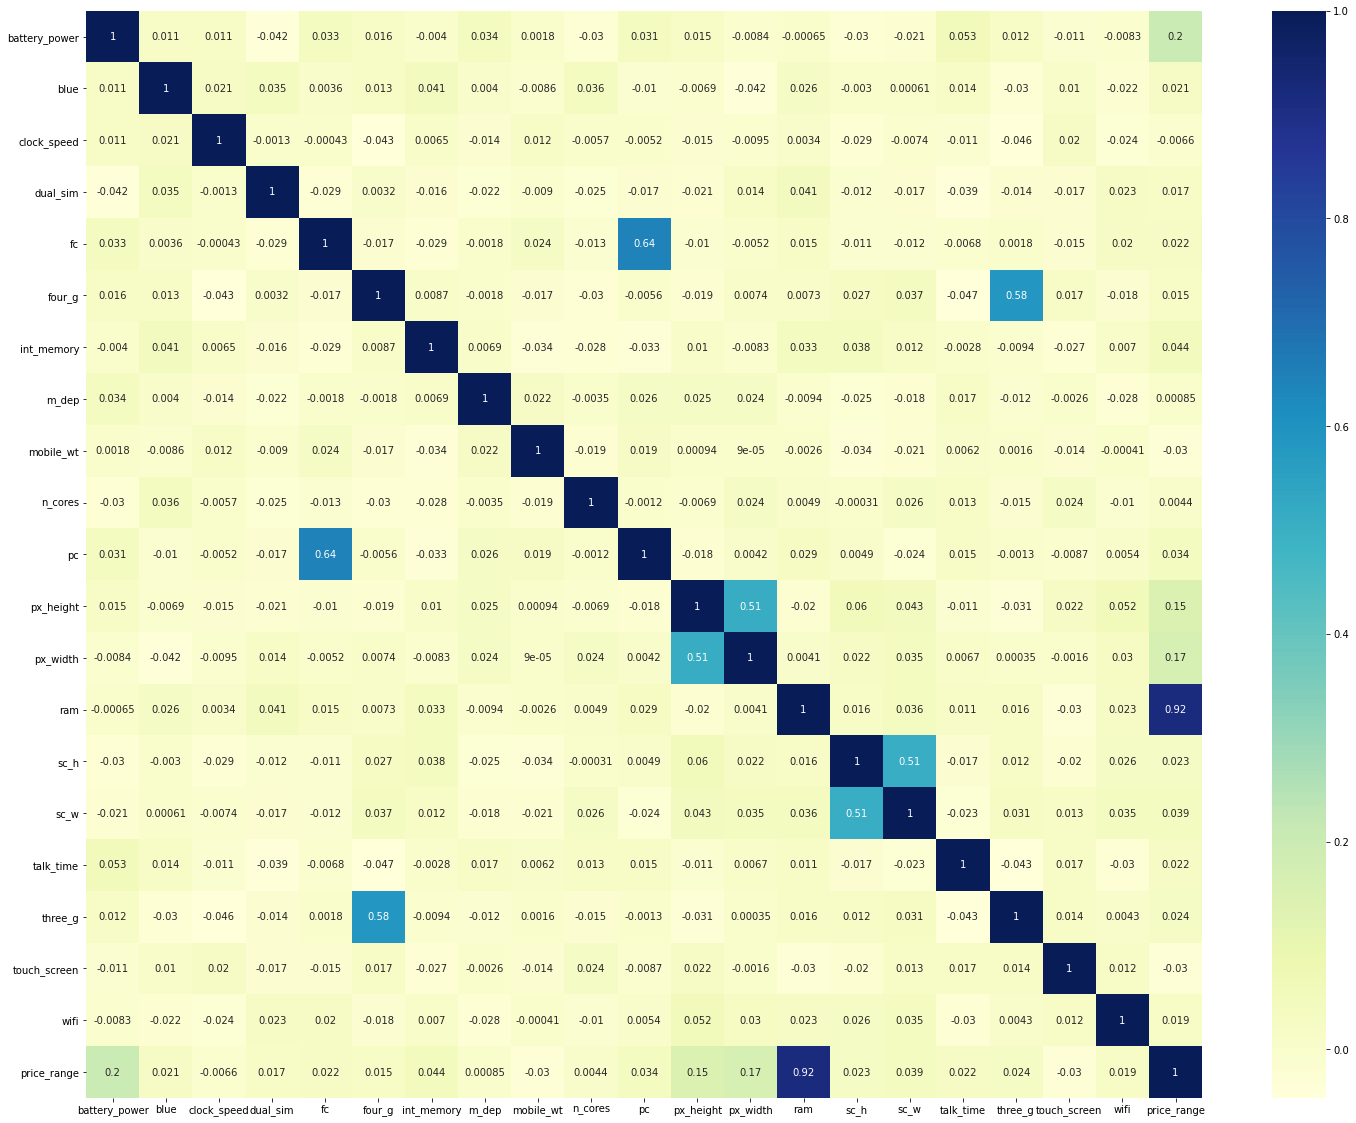

In [10]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

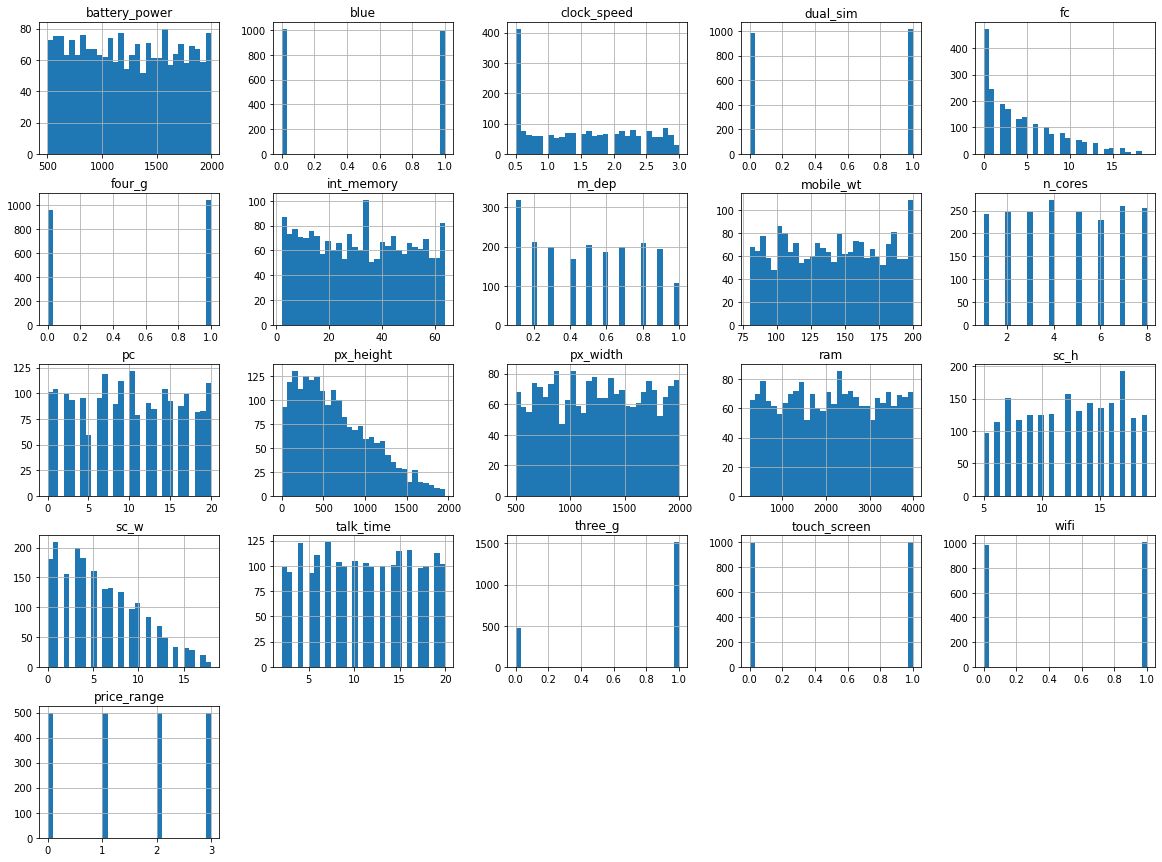

In [11]:
df.hist(figsize=(20,15), bins=30)
plt.show()

In [12]:
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

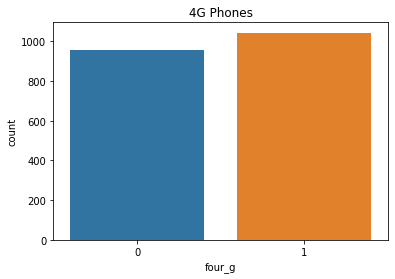

In [13]:
sns.countplot(x='four_g', data=df)
plt.title('4G Phones')
plt.show()

In [14]:
df['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

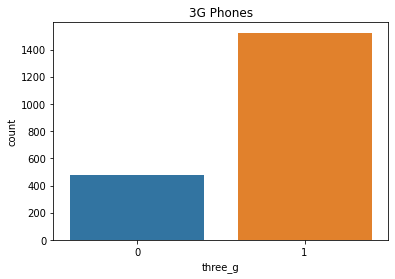

In [15]:
sns.countplot(x='three_g',data=df)
plt.title('3G Phones')
plt.show()

In [16]:
df['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

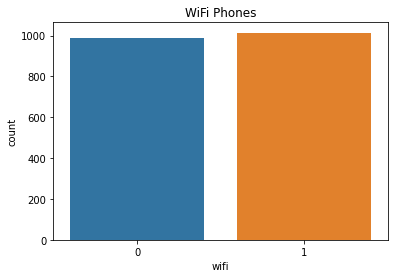

In [17]:
sns.countplot(x='wifi',data=df)
plt.title('WiFi Phones')
plt.show()

In [18]:
df['px_height'].describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

<AxesSubplot:xlabel='px_height'>

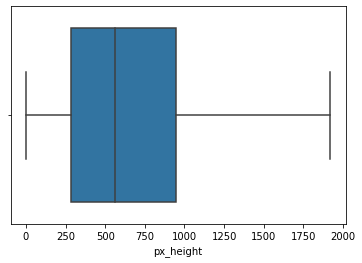

In [19]:
q1 = df.px_height.quantile(0.25)
q3 = df.px_height.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
df[df['px_height'] > upper_limit]
df=df[df['px_height'] < upper_limit]
sns.boxplot(df['px_height'])

In [20]:
x = df.drop('price_range',axis=1)
y = df['price_range']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=120)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1598, 20), (400, 20), (1598,), (400,))

In [22]:
x_test.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1891,1367,0,2.9,0,4,0,56,0.8,176,2,6,36,642,299,6,2,10,0,1,0
385,1880,1,1.8,0,4,1,18,0.7,138,3,5,71,699,3333,17,15,7,1,0,0
29,851,0,0.5,0,3,0,21,0.4,200,5,7,1171,1263,478,12,7,10,1,0,1
1650,1948,0,2.9,1,4,0,5,0.2,136,1,13,651,700,361,6,1,10,0,1,0
1859,649,1,1.4,0,4,1,19,0.8,190,7,12,344,1551,739,18,1,2,1,1,0


In [23]:
MODEL = []
TEST = []
TRAIN = []
def eval(model,test,train):
    MODEL.append(model)
    TEST.append(round(test,2))
    TRAIN.append(round(train,2))

In [24]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [26]:
y_pred=svm.predict(x_test)
y_pred

array([0, 3, 0, 0, 0, 3, 3, 2, 1, 2, 0, 1, 3, 2, 2, 3, 0, 0, 2, 3, 0, 0,
       3, 3, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 3, 0, 3, 3, 3, 0, 1, 1, 3,
       3, 3, 3, 2, 3, 2, 3, 0, 3, 1, 2, 3, 3, 3, 1, 3, 1, 2, 0, 2, 0, 0,
       2, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 3, 2, 0, 0, 0, 3,
       2, 1, 1, 3, 3, 3, 2, 0, 0, 3, 0, 1, 2, 2, 2, 3, 0, 3, 1, 0, 0, 0,
       3, 0, 0, 0, 3, 1, 0, 2, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 2, 0, 0, 2,
       2, 3, 2, 3, 2, 0, 1, 0, 0, 0, 0, 3, 2, 0, 1, 3, 3, 0, 2, 0, 1, 1,
       1, 0, 1, 2, 1, 3, 3, 3, 2, 3, 0, 0, 0, 0, 3, 2, 2, 1, 2, 3, 1, 1,
       1, 1, 1, 2, 0, 3, 1, 2, 0, 3, 3, 2, 3, 2, 2, 3, 3, 0, 2, 3, 3, 3,
       3, 3, 0, 2, 3, 3, 1, 2, 1, 2, 3, 1, 2, 0, 1, 2, 1, 0, 2, 3, 1, 2,
       2, 2, 2, 2, 1, 0, 1, 2, 0, 3, 2, 0, 3, 0, 1, 2, 1, 0, 3, 0, 0, 3,
       1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 3, 2, 0, 3,
       3, 2, 3, 2, 1, 3, 3, 3, 0, 0, 1, 1, 3, 3, 1, 0, 0, 2, 0, 0, 1, 2,
       2, 3, 1, 0, 0, 3, 0, 3, 0, 2, 0, 3, 3, 0, 1,

In [27]:
svm_test = svm.score(x_test, y_test)
svm_test

0.95

### saving model

In [28]:
# saving model
import pickle

with open("./SavedModels/model9","wb") as f:
    pickle.dump(svm,f)

In [29]:
# loading saved model
with open("./SavedModels/model9","rb") as f:
    lr=pickle.load(f)

In [31]:
bp=int(input("Enter Battery power: "))
blue=int(input("Bluetooth (1=YES 0=NO): "))
clk=float(input("Enter clock speed: "))
sim=int(input("dual sim (1=YES 0=NO): "))
fc=int(input("Front Camera mega pixels: "))
fg=int(input("Has 4G or not (1=YES 0=NO): "))
imem=int(input("Internal Memory(in GB): "))
mdep=float(input("Mobile Depth in cm: "))
wt=float(input("Weight of mobile phone: "))
nc=int(input("Number of cores of processor: "))
pc=int(input("Primary Camera mega pixels: "))
pxht=float(input("Pixel Resolution Height: "))
pxwd=float(input("Pixel Resolution Width: "))
ram=int(input("RAM (in GB): "))
sch=float(input("Screen Height of mobile in cm: "))
scw=float(input("Screen Width of mobile in cm: "))
tlkt=float(input("longest time that a single battery charge will last: "))
tg=int(input("Has 3G or not (1=YES 0=NO): "))
tch=int(input("Has touch screen or not (1=YES 0=NO): "))
wifi=int(input("Has wifi or not (1=YES 0=NO): "))

Enter Battery power: 1367
Bluetooth (1=YES 0=NO): 0
Enter clock speed: 2.9
dual sim (1=YES 0=NO): 0
Front Camera mega pixels: 4
Has 4G or not (1=YES 0=NO): 0
Internal Memory(in GB): 56
Mobile Depth in cm: 0.8
Weight of mobile phone: 176
Number of cores of processor: 2
Primary Camera mega pixels: 6
Pixel Resolution Height: 36
Pixel Resolution Width: 642
RAM (in GB): 299
Screen Height of mobile in cm: 6
Screen Width of mobile in cm: 2
longest time that a single battery charge will last: 10
Has 3G or not (1=YES 0=NO): 0
Has touch screen or not (1=YES 0=NO): 1
Has wifi or not (1=YES 0=NO): 0


In [32]:
lst=[[bp,blue,clk,sim,fc,fg,imem,mdep,wt,nc,pc,pxht,pxwd,ram,sch,scw,tlkt,tg,tch,wifi]]
lst

[[1367,
  0,
  2.9,
  0,
  4,
  0,
  56,
  0.8,
  176.0,
  2,
  6,
  36.0,
  642.0,
  299,
  6.0,
  2.0,
  10.0,
  0,
  1,
  0]]

In [33]:
lr.predict(lst)

array([0], dtype=int64)